# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv("Profissao- Cientista de Dados_M10_support material.csv")
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
df.drop(labels=["index","Unnamed: 0"], axis=1, inplace=True);

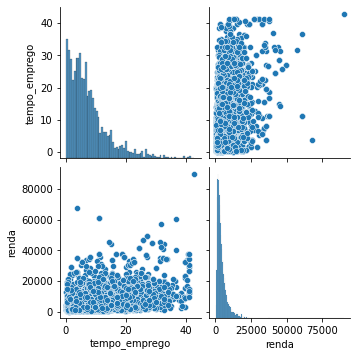

In [4]:
var_quant_continua = ["tempo_emprego", "renda"]
# hue="tipo_renda"
sns.pairplot(data=df, vars=var_quant_continua);

In [5]:
df[var_quant_continua].corr()

,tempo_emprego,renda
tempo_emprego,1.000000,0.394235
renda,0.394235,1.000000


**Insight**: O gráfico de dispersão acusa intuitivamente que a renda e o tempo de emprego dos clientes possam ter uma correlação baixa. Isto é confirmado pela matriz de correlação, que expõe o valor de 0,4 de correlação positiva, que considero insuficiente para considerá-los úteis na previsão de renda dos clientes. 

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [6]:
df.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


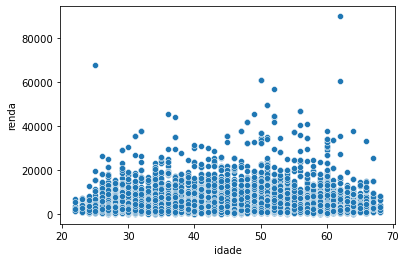

In [7]:
#step 2
#Dispersão da renda

sns.scatterplot(data=df, x="idade", y="renda");

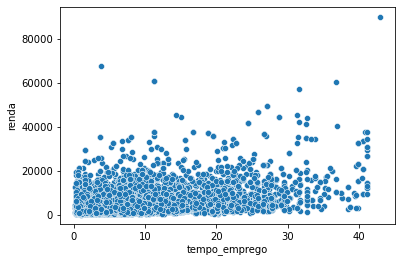

In [8]:
#Dispersão Tempo de emprego x renda

sns.scatterplot(data=df, y= "renda", x= "tempo_emprego");

**Avaliação**: A primeira maior correlação é entre as únicas variáveis contínuas (já mencionadas no primeiro exercício), a segunda maior é entre uma contínua e uma discreta, que não é recomendável aplicar-lhes o coeficiente de correlação de pearson. 

3) Na sua opinião, há outliers na variável renda?

In [9]:
df["renda"].describe()

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

Sim. Pode-se notar que no intervalo interquatílico temos uma renda entre 1 a 5 unidades de milhar, enquanto o valor mínimo é uma centena e o valor máximo são 8 dezenas de milhar, ou seja, valores exagerados comparados ao grupo central.Além disso, o boxplot acusa presença de outliers.

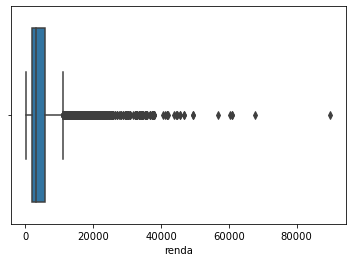

In [10]:
sns.boxplot(data=df, x="renda");

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [11]:
df["log_renda"] = np.log(df["renda"])

In [12]:
df["log_renda"].describe()

count    15000.000000
mean         8.111047
std          0.797451
min          5.074549
25%          7.573398
50%          8.095068
75%          8.638059
max         11.406654
Name: log_renda, dtype: float64

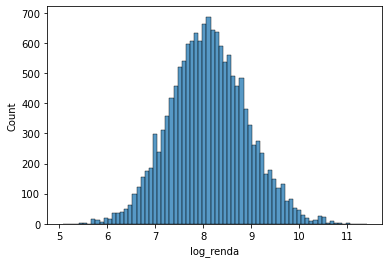

In [13]:
sns.histplot(data=df, x="log_renda");

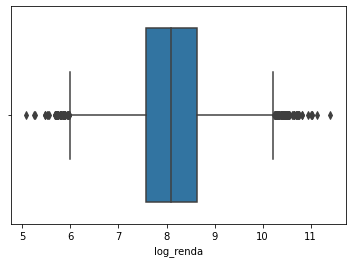

In [14]:
sns.boxplot(data=df, x="log_renda");

Ainda está presente outliers na distribuição.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A única coisa que vejo com maior evidência de melhora é que o logarítimo normalizou, melhor dizendo, tornou simétrico a distribuição que era assimétrica à esquerda.